# Windstress tau_x

### Tech Preamble

In [1]:
import xarray as xr
import scipy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
import cmocean.cm as cm 
import cmocean.tools as cmt
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")

### Load Data

##### Non-Nested Control (FOCI1.3 control-1950)


In [2]:
%%time
# Define the pattern to match the file names
file_pattern = "/Projekte/fb1-me-foci/moedalen_hiwi/FOCI3.0_MO060/outdata/nemo/nemo/FOCI3.0_MO060_1m_*_grid_U.nc"  # Adjust the path and prefix to match your files

# Load all datasets matching the pattern into a single xarray dataset
ds_no_nest_ctrl = xr.open_mfdataset(file_pattern)
ds_no_nest_ctrl = ds_no_nest_ctrl.set_coords(('nav_lat', 'nav_lon'))


CPU times: user 1min 4s, sys: 17.8 s, total: 1min 22s
Wall time: 2min 31s


##### Nested Control (WG10 control-1950)


In [3]:
%%time
# Define the pattern to match the file names
file_pattern = "/Projekte/fb1-me-foci/moedalen_hiwi/WG10_MO053/outdata/nemo/WG10_MO053_1m_*_grid_U.nc"  # Adjust the path and prefix to match your files

# Load all datasets matching the pattern into a single xarray dataset
ds_nest_ctrl = xr.open_mfdataset(file_pattern)
ds_nest_ctrl = ds_nest_ctrl.set_coords(('nav_lat', 'nav_lon'))


CPU times: user 29.8 s, sys: 4.26 s, total: 34 s
Wall time: 1min


##### Non-Nested 4xCO2 (FOCI1.3 abrupt-4xCO2)


In [4]:
%%time
# Define the pattern to match the file names
file_pattern = "/Projekte/fb1-me-foci/moedalen_hiwi/FOCI3.0_MO061/outdata/nemo/nemo/FOCI3.0_MO061_1m_*_grid_U.nc"  # Adjust the path and prefix to match your files

# Load all datasets matching the pattern into a single xarray dataset
ds_no_nest_4xCO2 = xr.open_mfdataset(file_pattern)
ds_no_nest_4xCO2 = ds_no_nest_4xCO2.set_coords(('nav_lat', 'nav_lon'))


CPU times: user 9.96 s, sys: 1.46 s, total: 11.4 s
Wall time: 19.3 s


##### Nested 4xCO2 (WG10 abrupt-4xCO2)


In [5]:
%%time
# Define the pattern to match the file names
file_pattern = '/Projekte/fb1-me-foci/moedalen_hiwi/WG10_MO055/outdata/nemo/nemo/WG10_MO055_1m_*_grid_U.nc'  # Adjust the path and prefix to match your files

# Load all datasets matching the pattern into a single xarray dataset
ds_nest_4xCO2 = xr.open_mfdataset(file_pattern)
ds_nest_4xCO2 = ds_nest_4xCO2.set_coords(('nav_lat', 'nav_lon'))


CPU times: user 10.1 s, sys: 1.44 s, total: 11.5 s
Wall time: 19.2 s


#### Data Prep

In [6]:
#create list of all 

ds = [ds_no_nest_ctrl, ds_nest_ctrl, ds_no_nest_4xCO2, ds_nest_4xCO2]
title_list = ['control-1950-FOCI3 ', 'control-1950_WG10', 'abrupt-4xCO2-FOCI3', 'abrupt-4xCO2-WG10']

In [7]:
#specify area
for i in range(len(ds)):
    ds[i] = ds[i].isel(y = range(210), x = range(400, 700))

In [8]:
ds[0] = ds[0].isel(time_counter = range(1080, 1320))
ds[1] = ds[1].isel(time_counter = range(1080, 1320))
ds[2] = ds[2].isel(time_counter = range(240, 480))
ds[3] = ds[3].isel(time_counter = range(240, 480))

### Plots 

#### Temporal Mean (over all 20 years)

In [9]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_temp_mean = foo;

for i in range(len(ds)):
    ds_temp_mean[i] = ds[i].sozotaux.mean(dim = 'time_counter')

## Differences Model Resolution - WG10 vs. FOCI3    

control-1950 

In [10]:
WG10_FOCI13_control_1950 = ds_temp_mean[1]-ds_temp_mean[0]

abrupt-4xCO2

In [11]:
WG10_FOCI13_abrupt_4xCO2 = ds_temp_mean[3]-ds_temp_mean[2]

In [12]:
arr1 = [ds_temp_mean[0], ds_temp_mean[2], ds_temp_mean[1], ds_temp_mean[3], WG10_FOCI13_control_1950, WG10_FOCI13_abrupt_4xCO2]

In [13]:
arr1_title_list = ['control-1950-FOCI3', 'abrupt-4xCO2-FOCI3', 'control-1950-WG10', 'abrupt-4xCO2-FOCI3', 'control-1950-Diff.(WG10-FOCI3)', 'abrupt-4xCO2-Diff.(WG10-FOCI3)']

CPU times: user 57.7 s, sys: 15.8 s, total: 1min 13s
Wall time: 1min 25s


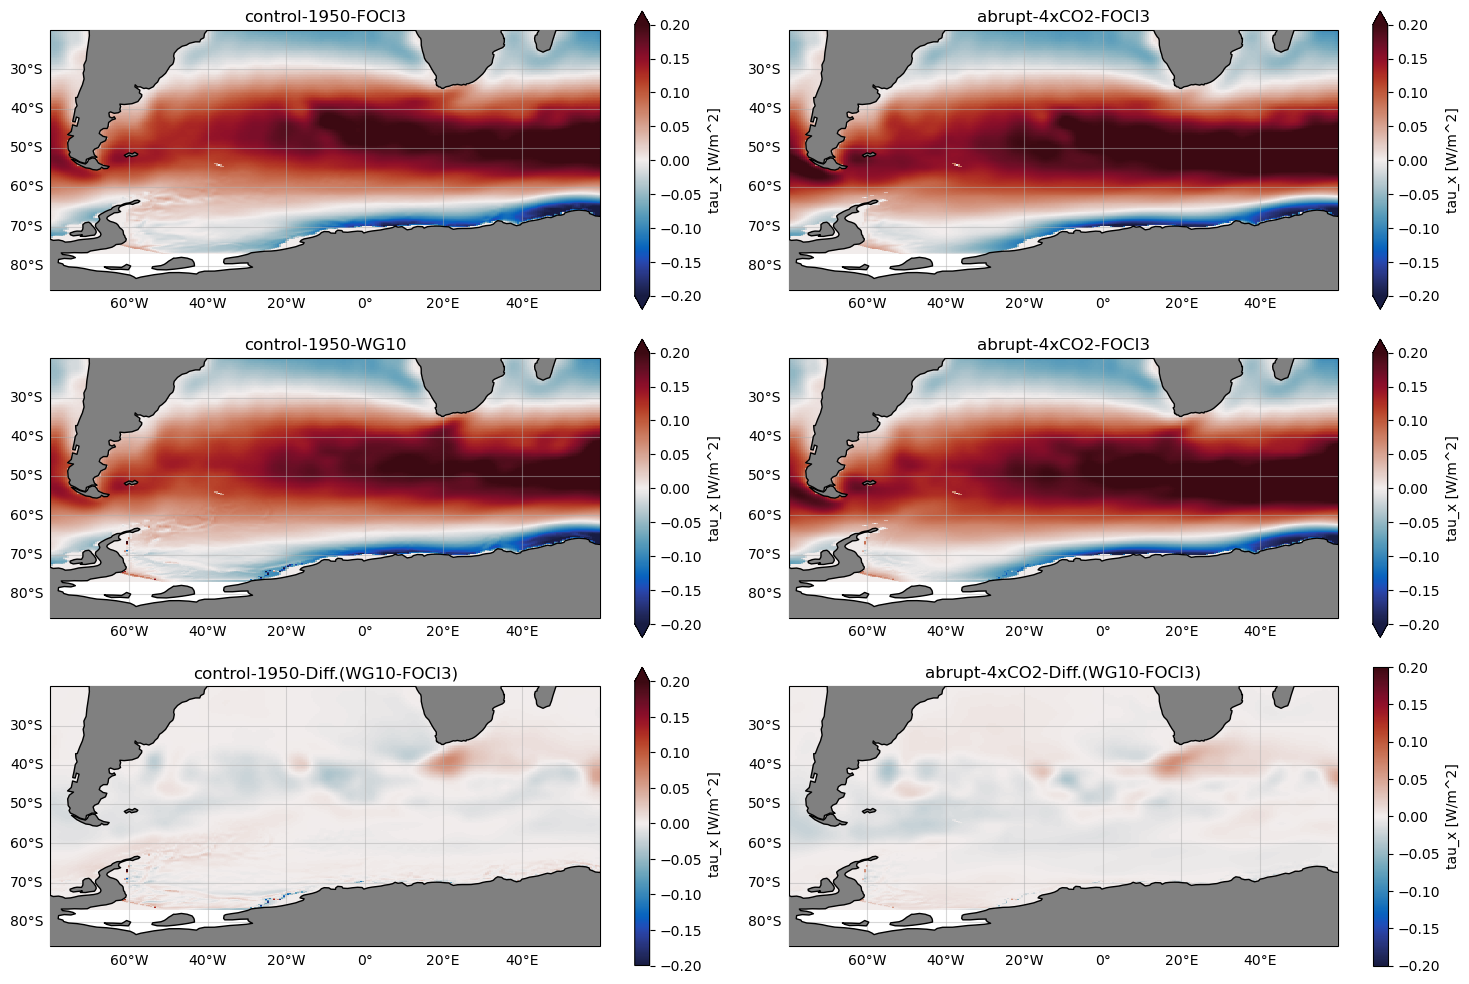

In [14]:
%%time

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(3,2, figsize = (15,10), subplot_kw ={ 'projection' : proj })

for i, ax in enumerate(fig.axes):
    p = arr1[i].plot.pcolormesh(x = 'nav_lon', y = 'nav_lat', transform = proj, vmax = 0.2, ax = ax,cmap = cm.balance, add_colorbar=True, cbar_kwargs = {'label':'tau_x [W/m^2]'})

    gl = ax.gridlines(draw_labels = True, alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor = '00', zorder = 6)
    ax.set_extent((-80, 60,-80,-20))
    ax.set_title(arr1_title_list[i])

plt.tight_layout()

## Differences - climate change - control-1950 vs. abrupt-4xCO2   

FOCI1.3

In [15]:
FOCI13_4xCO2_1950 = ds_temp_mean[2]-ds_temp_mean[0]

WG10

In [16]:
WG10_4xCO2_1950 = ds_temp_mean[3]-ds_temp_mean[1]

In [17]:
arr2 = [ds_temp_mean[0], ds_temp_mean[1], ds_temp_mean[2], ds_temp_mean[3],FOCI13_4xCO2_1950 ,WG10_4xCO2_1950]

In [18]:
arr2_title_list = ['control-1950-FOCI3', 'control-1950-WG10', 'abrupt-4xCO2-FOCI3', 'abrupt-4xCO2-WG10', 'Diff.(abrupt-4xCO2-control-1950)-FOCI1.3', 'Diff.(abrupt-4xCO2-control-1950)-WG10']

CPU times: user 57.3 s, sys: 15 s, total: 1min 12s
Wall time: 1min 14s


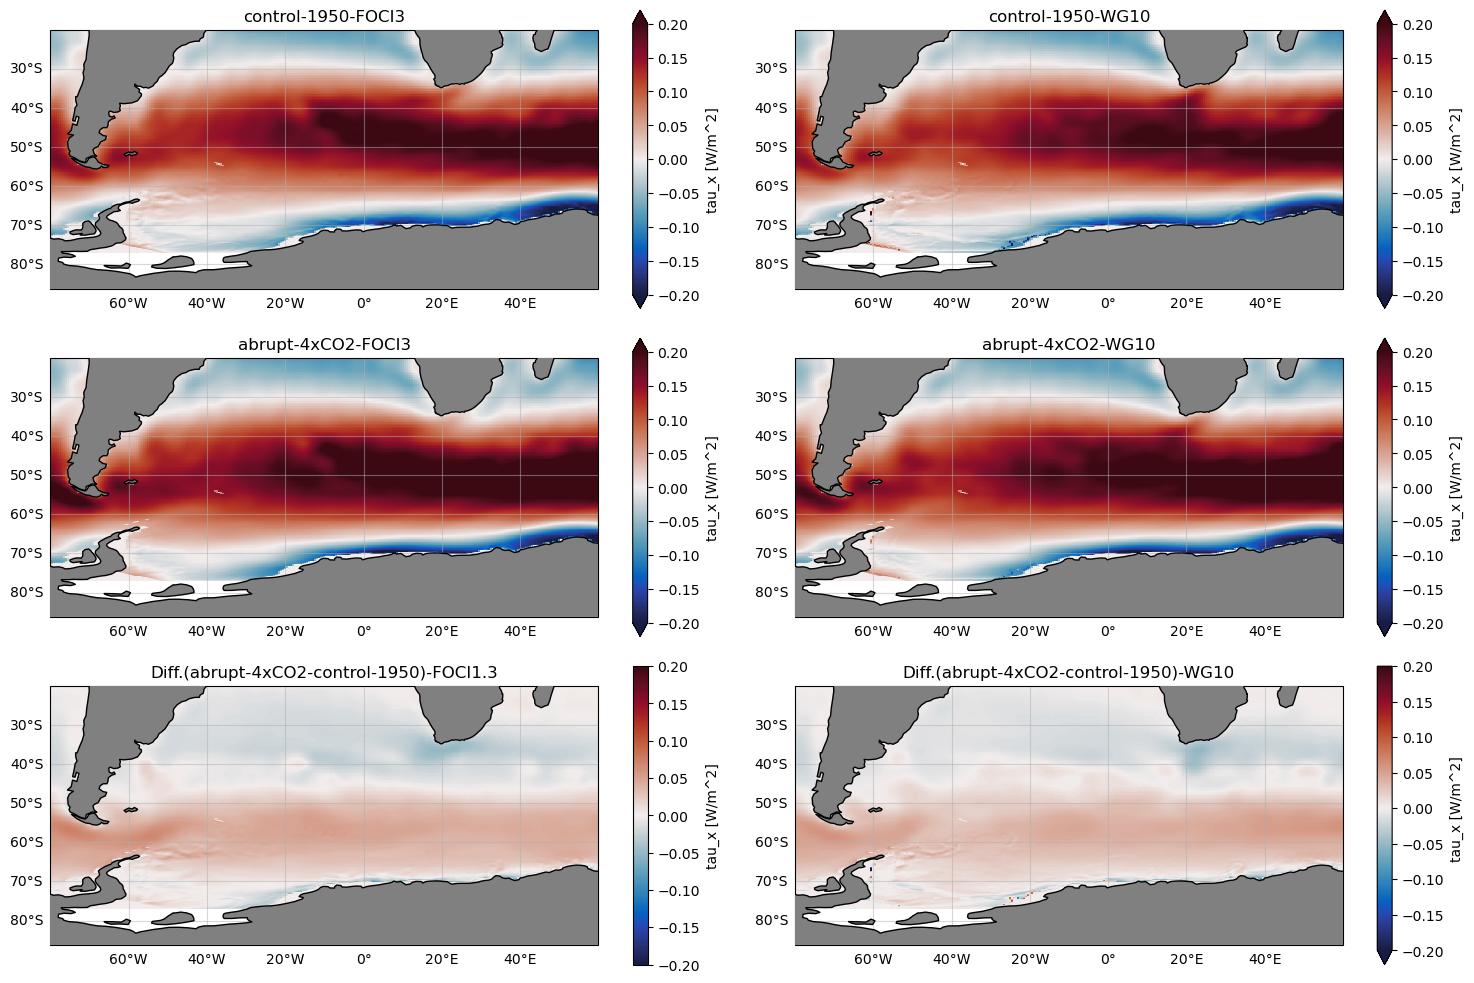

In [19]:
%%time

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(3,2, figsize = (15,10), subplot_kw ={ 'projection' : proj })

for i, ax in enumerate(fig.axes):
    p = arr2[i].plot.pcolormesh(x = 'nav_lon', y = 'nav_lat', transform = proj, vmax = 0.2, ax = ax,cmap = cm.balance, add_colorbar=True, cbar_kwargs = {'label':'tau_x [W/m^2]'})

    gl = ax.gridlines(draw_labels = True, alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor = '00', zorder = 6)
    ax.set_extent((-80, 60,-80,-20))
    ax.set_title(arr2_title_list[i])

plt.tight_layout()

## Seasonal Cycle

In [21]:
foo = xr.full_like(ds[1], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_group = foo;

for i in range(len(ds)):
    ds_group[i] = ds[i].sozotaux.groupby('time_counter.month').mean()

In [22]:
arr3 = [ds_group[2].sel(month=1)-ds_group[0].sel(month=1), ds_group[3].sel(month=1)-ds_group[1].sel(month=1), ds_group[2].sel(month=10)-ds_group[0].sel(month=10), ds_group[3].sel(month=10)-ds_group[1].sel(month=10)]

In [23]:
arr3_title_list = ['Diff.(abrupt-4xCO2-FOCI3-control-1950-FOCI3) Jan', 'Diff.(abrupt-4xCO2-WG10-control-1950-WG10) Jan', 'Diff.(abrupt-4xCO2-FOCI3-control-1950-FOCI3) Oct', 'Diff.(abrupt-4xCO2-WG10-control-1950-WG10) Oct']

CPU times: user 5.96 s, sys: 1.96 s, total: 7.93 s
Wall time: 7.73 s


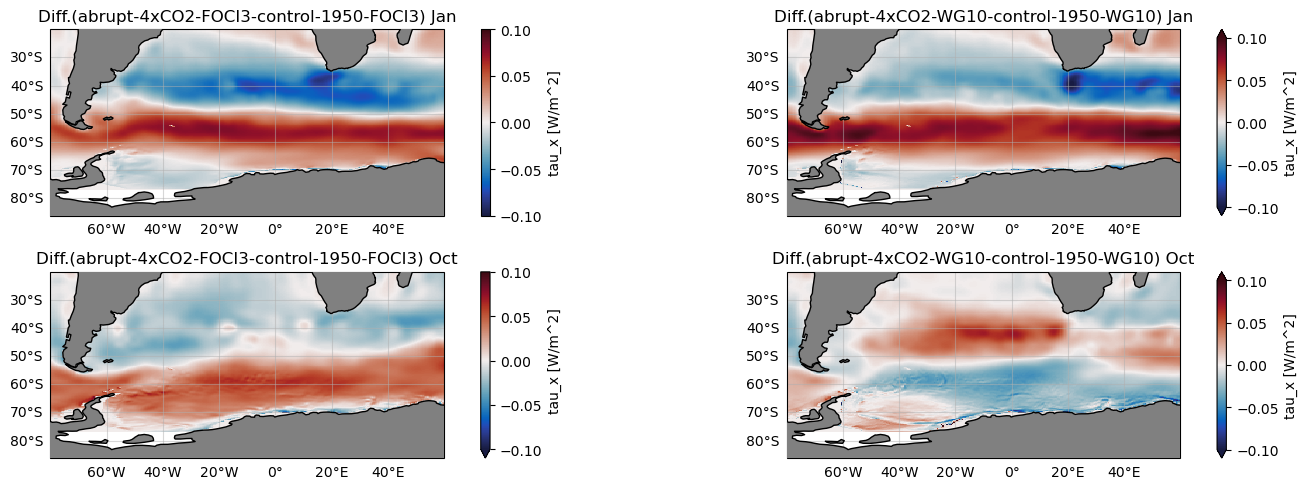

In [24]:
%%time

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(2,2, figsize = (15,5), subplot_kw ={ 'projection' : proj })

for i, ax in enumerate(fig.axes):
    p = arr3[i].plot.pcolormesh(x = 'nav_lon', y = 'nav_lat', transform = proj, vmax = 0.1, ax = ax,cmap = cm.balance, add_colorbar=True, cbar_kwargs = {'label':'tau_x [W/m^2]'})

    gl = ax.gridlines(draw_labels = True, alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor = '00', zorder = 6)
    ax.set_extent((-80, 60,-80,-20))
    ax.set_title(arr3_title_list[i])

plt.tight_layout()

#### Get Boxes

y = 140 is nav_lat = 47.76

In [25]:
# foo = xr.full_like(ds[1], fill_value=np.nan)
# foo = [foo, foo, foo, foo];

# box3 = foo;

# #specify area
# for i in range(len(ds)):
#     box3[i] = ds[i].isel(y = 140, x = range(400, 700))

In [26]:
ds = [ds_no_nest_ctrl, ds_nest_ctrl, ds_no_nest_4xCO2, ds_nest_4xCO2]

In [27]:
ds[0] = ds[0].isel(time_counter = range(1080, 1320))
ds[1] = ds[1].isel(time_counter = range(1080, 1320))
ds[2] = ds[2].isel(time_counter = range(240, 480))
ds[3] = ds[3].isel(time_counter = range(240, 480))

In [28]:
foo = xr.full_like(ds[1], fill_value=np.nan)
foo = [foo, foo, foo, foo];

box1 = foo;

#specify area
for i in range(len(ds)):
    box1[i] = ds[i].isel(y = range(140, 210), x = range(400, 700))

In [29]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

box2 = foo;

#specify area
for i in range(len(ds)):
    box2[i] = ds[i].isel(y = range(140), x = range(400, 700))

In [30]:
# plt.figure
# box3[i].nav_lat.plot(x = 'nav_lon')
# plt.ylim(-48, -47.6)

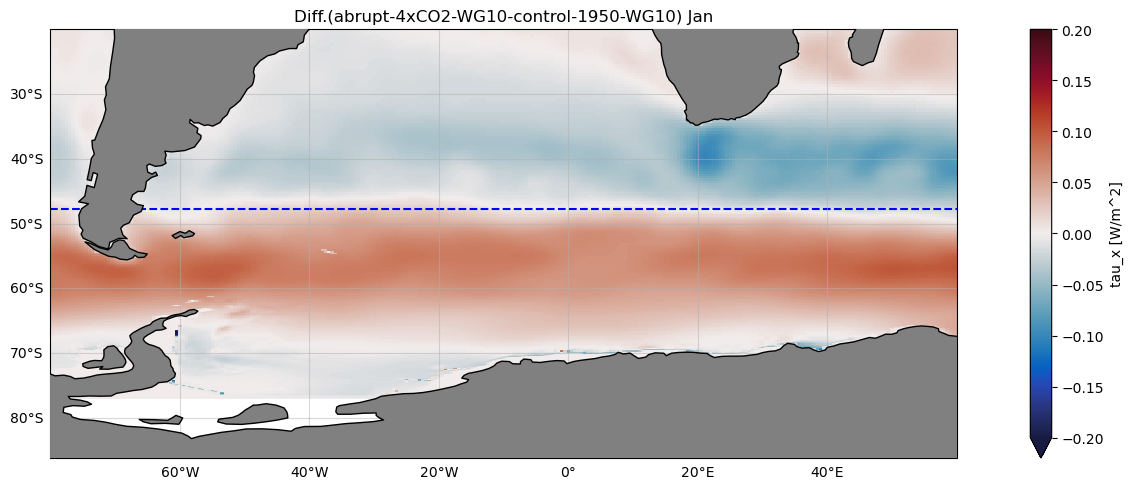

In [33]:
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(1,1, figsize = (15,5), subplot_kw ={ 'projection' : proj })

arr3[1].plot.pcolormesh(x = 'nav_lon', y = 'nav_lat', transform = proj, vmax = 0.2, ax = ax,cmap = cm.balance, add_colorbar=True, cbar_kwargs = {'label':'tau_x [W/m^2]'})

gl = ax.gridlines(draw_labels = True, alpha = 0.5)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor = '00', zorder = 6)
ax.set_extent((-80, 60,-80,-20))

plt.axhline(y=-47.76, color='b', linestyle='--', label='Box Separation Line')
ax.set_title(arr3_title_list[1])
# plt.legend()

plt.tight_layout()

## Spatial Mean - over entire area

In [34]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_spat_mean = foo;

for i in range(len(ds)):
    ds_spat_mean[i] = ds[i].sozotaux.mean(dim = ('x', 'y'))

In [35]:
color_hm = ['darkorange', 'mediumslateblue', 'cornflowerblue', 'mediumseagreen']

CPU times: user 3min 17s, sys: 26.5 s, total: 3min 44s
Wall time: 2min 49s


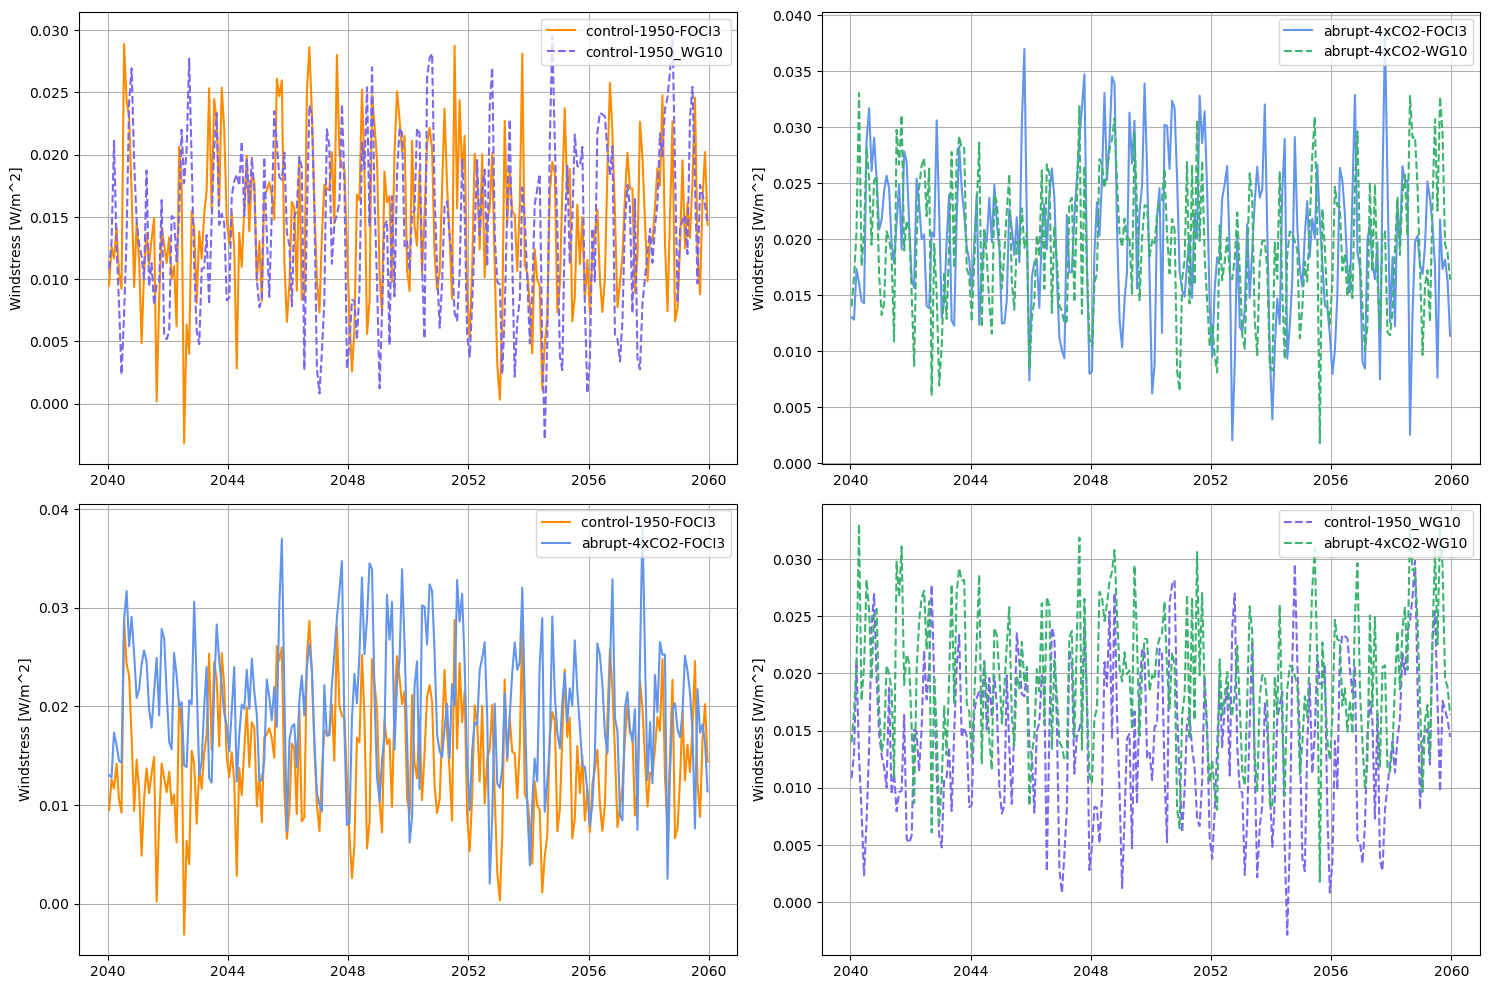

In [36]:
%%time

fig, ax = plt.subplots(2,2, figsize = (15,10))

ax[0, 0].plot(ds_spat_mean[0].time_counter, ds_spat_mean[0], label=title_list[0], color = color_hm[0]) 
ax[0, 0].plot(ds_spat_mean[1].time_counter, ds_spat_mean[1], label=title_list[1], color = color_hm[1], linestyle = '--')  
ax[0, 0].legend(loc='upper right')
ax[0, 0].grid()
ax[0, 0].set_ylabel('Windstress [W/m^2]')

ax[0, 1].plot(ds_spat_mean[2].time_counter, ds_spat_mean[2], label=title_list[2], color = color_hm[2], linestyle = '-') 
ax[0, 1].plot(ds_spat_mean[3].time_counter, ds_spat_mean[3], label=title_list[3], color = color_hm[3], linestyle = '--')  
ax[0, 1].legend(loc='upper right')
ax[0, 1].grid()
ax[0, 1].set_ylabel('Windstress [W/m^2]')

ax[1, 0].plot(ds_spat_mean[0].time_counter, ds_spat_mean[0], label=title_list[0], color = color_hm[0], linestyle = '-') 
ax[1, 0].plot(ds_spat_mean[2].time_counter, ds_spat_mean[2], label=title_list[2], color = color_hm[2], linestyle = '-')  
ax[1, 0].legend(loc='upper right')
ax[1, 0].grid()
ax[1, 0].set_ylabel('Windstress [W/m^2]')

ax[1, 1].plot(ds_spat_mean[1].time_counter, ds_spat_mean[1], label=title_list[1], color = color_hm[1], linestyle = '--') 
ax[1, 1].plot(ds_spat_mean[3].time_counter, ds_spat_mean[3], label=title_list[3], color = color_hm[3], linestyle = '--')
ax[1, 1].legend(loc='upper right')
ax[1, 1].grid()
ax[1, 1].set_ylabel('Windstress [W/m^2]')

plt.tight_layout()

#### Moving Averages

In [37]:
def moving_average(x, w): #wwindowsize in months
    return np.convolve(x, np.ones(w), 'valid') / w

In [38]:
#get time vector 
time_vec = ds[i].time_counter[1:]

#### 3 Month moving ave

In [39]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_spat_mean_mov_ave_3 = foo

for i in range(len(ds)):
    ds_spat_mean_mov_ave_3[i] = moving_average(ds_spat_mean[i], 3)

CPU times: user 564 ms, sys: 219 ms, total: 783 ms
Wall time: 409 ms


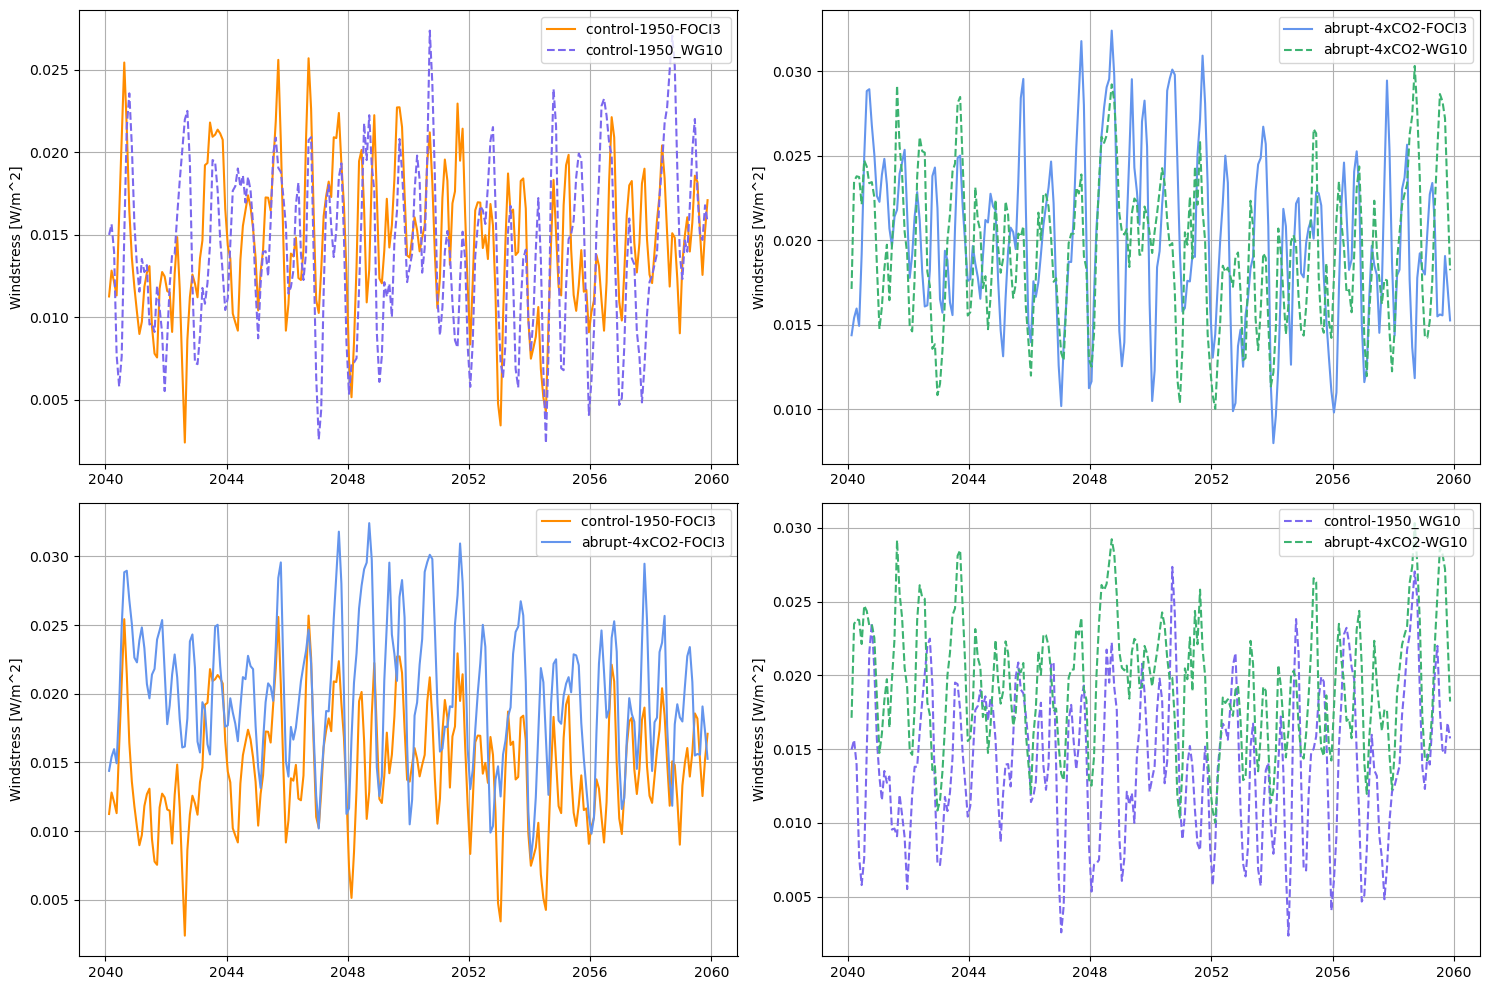

In [40]:
%%time

fig, ax = plt.subplots(2,2, figsize = (15,10))

ax[0, 0].plot(time_vec[:-1], ds_spat_mean_mov_ave_3[0], label=title_list[0], color = color_hm[0]) 
ax[0, 0].plot(time_vec[:-1], ds_spat_mean_mov_ave_3[1], label=title_list[1], color = color_hm[1], linestyle = '--')  
ax[0, 0].legend(loc='upper right')
ax[0, 0].grid()
ax[0, 0].set_ylabel('Windstress [W/m^2]')

ax[0, 1].plot(time_vec[:-1], ds_spat_mean_mov_ave_3[2], label=title_list[2], color = color_hm[2], linestyle = '-') 
ax[0, 1].plot(time_vec[:-1], ds_spat_mean_mov_ave_3[3], label=title_list[3], color = color_hm[3], linestyle = '--')  
ax[0, 1].legend(loc='upper right')
ax[0, 1].grid()
ax[0, 1].set_ylabel('Windstress [W/m^2]')

ax[1, 0].plot(time_vec[:-1], ds_spat_mean_mov_ave_3[0], label=title_list[0], color = color_hm[0], linestyle = '-') 
ax[1, 0].plot(time_vec[:-1], ds_spat_mean_mov_ave_3[2], label=title_list[2], color = color_hm[2], linestyle = '-')  
ax[1, 0].legend(loc='upper right')
ax[1, 0].grid()
ax[1, 0].set_ylabel('Windstress [W/m^2]')

ax[1, 1].plot(time_vec[:-1], ds_spat_mean_mov_ave_3[1], label=title_list[1], color = color_hm[1], linestyle = '--') 
ax[1, 1].plot(time_vec[:-1], ds_spat_mean_mov_ave_3[3], label=title_list[3], color = color_hm[3], linestyle = '--')
ax[1, 1].legend(loc='upper right')
ax[1, 1].grid()
ax[1, 1].set_ylabel('Windstress [W/m^2]')

plt.tight_layout()

In [41]:
arr4 = [ds_spat_mean[2]-ds_spat_mean[0], ds_spat_mean[3]-ds_spat_mean[1] ]

In [42]:
arr4_title_list = ['Diff.(abrupt-4xCO2-FOCI3-control-1950-FOCI3)', 'Diff.(abrupt-4xCO2-WG10-control-1950-WG10)']

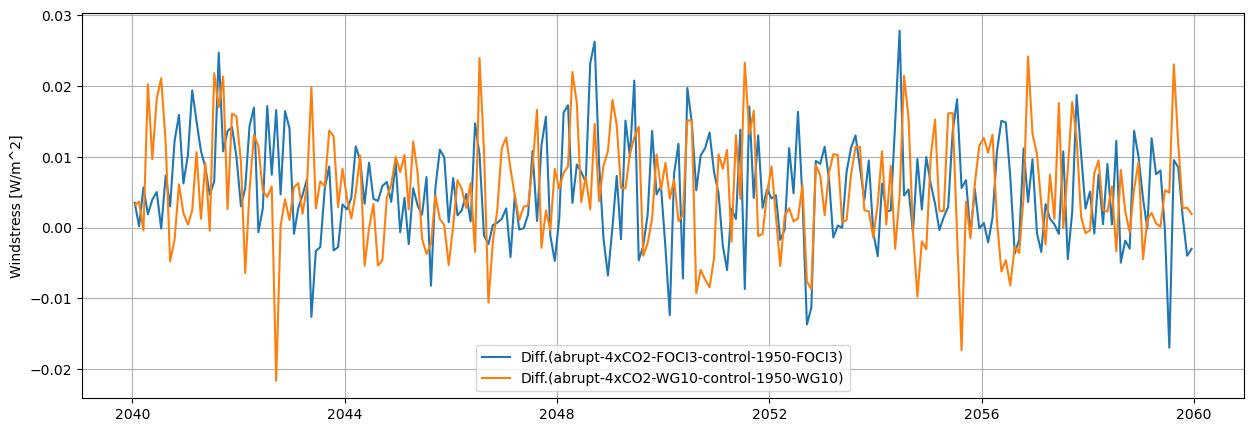

CPU times: user 1min 41s, sys: 13.9 s, total: 1min 55s
Wall time: 1min 27s


In [43]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(arr4)):
    ax.plot(arr4[i].time_counter, arr4[i], label = arr4_title_list[i])

ax.legend()
ax.grid()
# ax.set_title('Annual Mean')
ax.set_ylabel('Windstress [W/m^2]')
plt.show()

In [44]:
arr5 = [ds_spat_mean_mov_ave_3[2]-ds_spat_mean_mov_ave_3[0], ds_spat_mean_mov_ave_3[3]-ds_spat_mean_mov_ave_3[1] ]

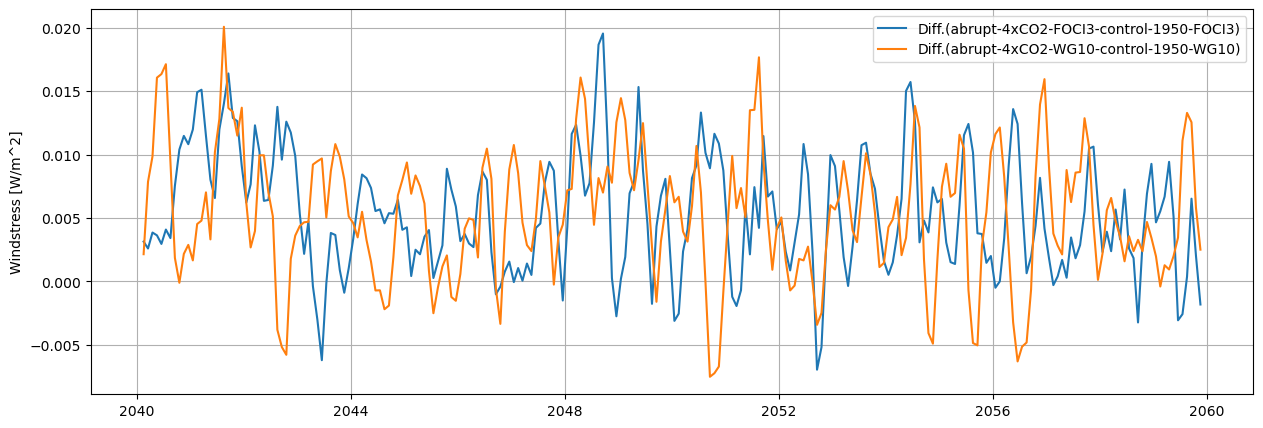

CPU times: user 475 ms, sys: 234 ms, total: 709 ms
Wall time: 438 ms


In [45]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(arr4)):
    ax.plot(time_vec[:-1], arr5[i], label = arr4_title_list[i])

ax.legend()
ax.grid()
# ax.set_title('Annual Mean')
ax.set_ylabel('Windstress [W/m^2]')
plt.show()

In [46]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

box1_spat_mean = foo;

for i in range(len(ds)):
    box1_spat_mean[i] = box1[i].sozotaux.mean(dim = ('x', 'y'))

In [47]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

box2_spat_mean = foo;

for i in range(len(ds)):
    box2_spat_mean[i] = box2[i].sozotaux.mean(dim = ('x', 'y'))

In [48]:
arr6 = [box1_spat_mean[2] - box1_spat_mean[0], box2_spat_mean[2] - box2_spat_mean[0]]

In [49]:
arr7 = [box1_spat_mean[3] - box1_spat_mean[1], box2_spat_mean[3] - box2_spat_mean[1]]

In [50]:
arr6_title_list = ['Box1', 'Box2']

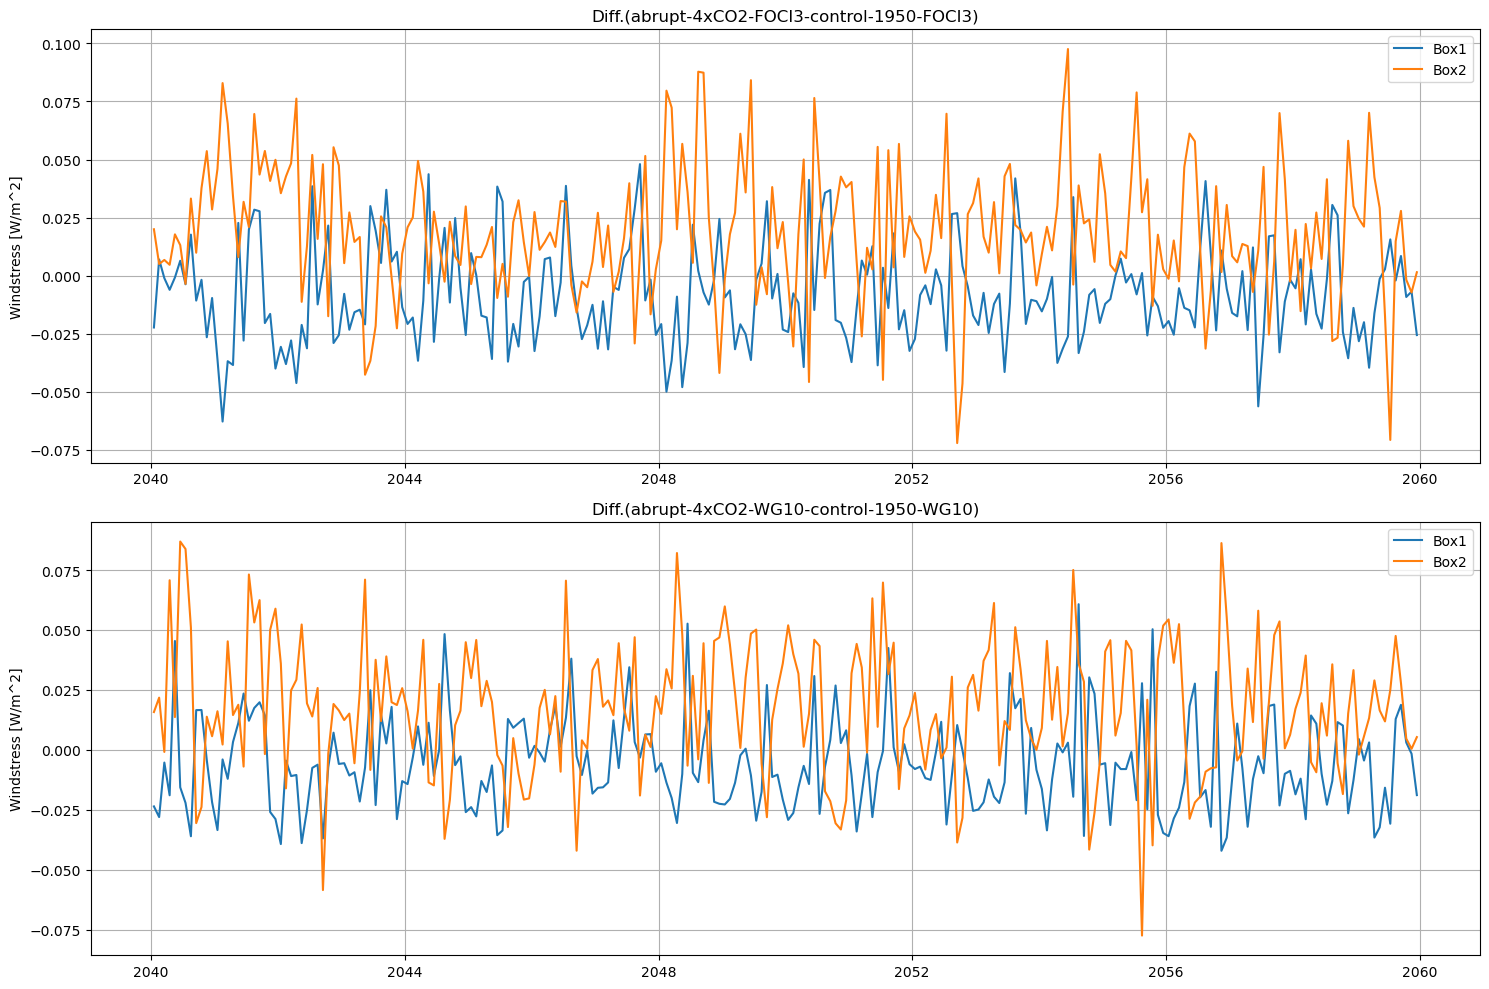

In [51]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

for i in range(len(arr6)):
    ax[0].plot(arr6[i].time_counter, arr6[i], label = arr6_title_list[i])
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Windstress [W/m^2]')
ax[0].set_title('Diff.(abrupt-4xCO2-FOCI3-control-1950-FOCI3)')

for i in range(len(arr6)):
    ax[1].plot(arr7[i].time_counter, arr7[i], label = arr6_title_list[i])
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Windstress [W/m^2]')
ax[1].set_title('Diff.(abrupt-4xCO2-WG10-control-1950-WG10)')

plt.tight_layout()

In [52]:
arr8 = [box1_spat_mean[2] - box1_spat_mean[0], box1_spat_mean[3] - box1_spat_mean[1]]
arr9 = [box2_spat_mean[2] - box2_spat_mean[0], box2_spat_mean[3] - box2_spat_mean[1]]

In [53]:
arr8_title_list = ['FOCI3', 'WG10']

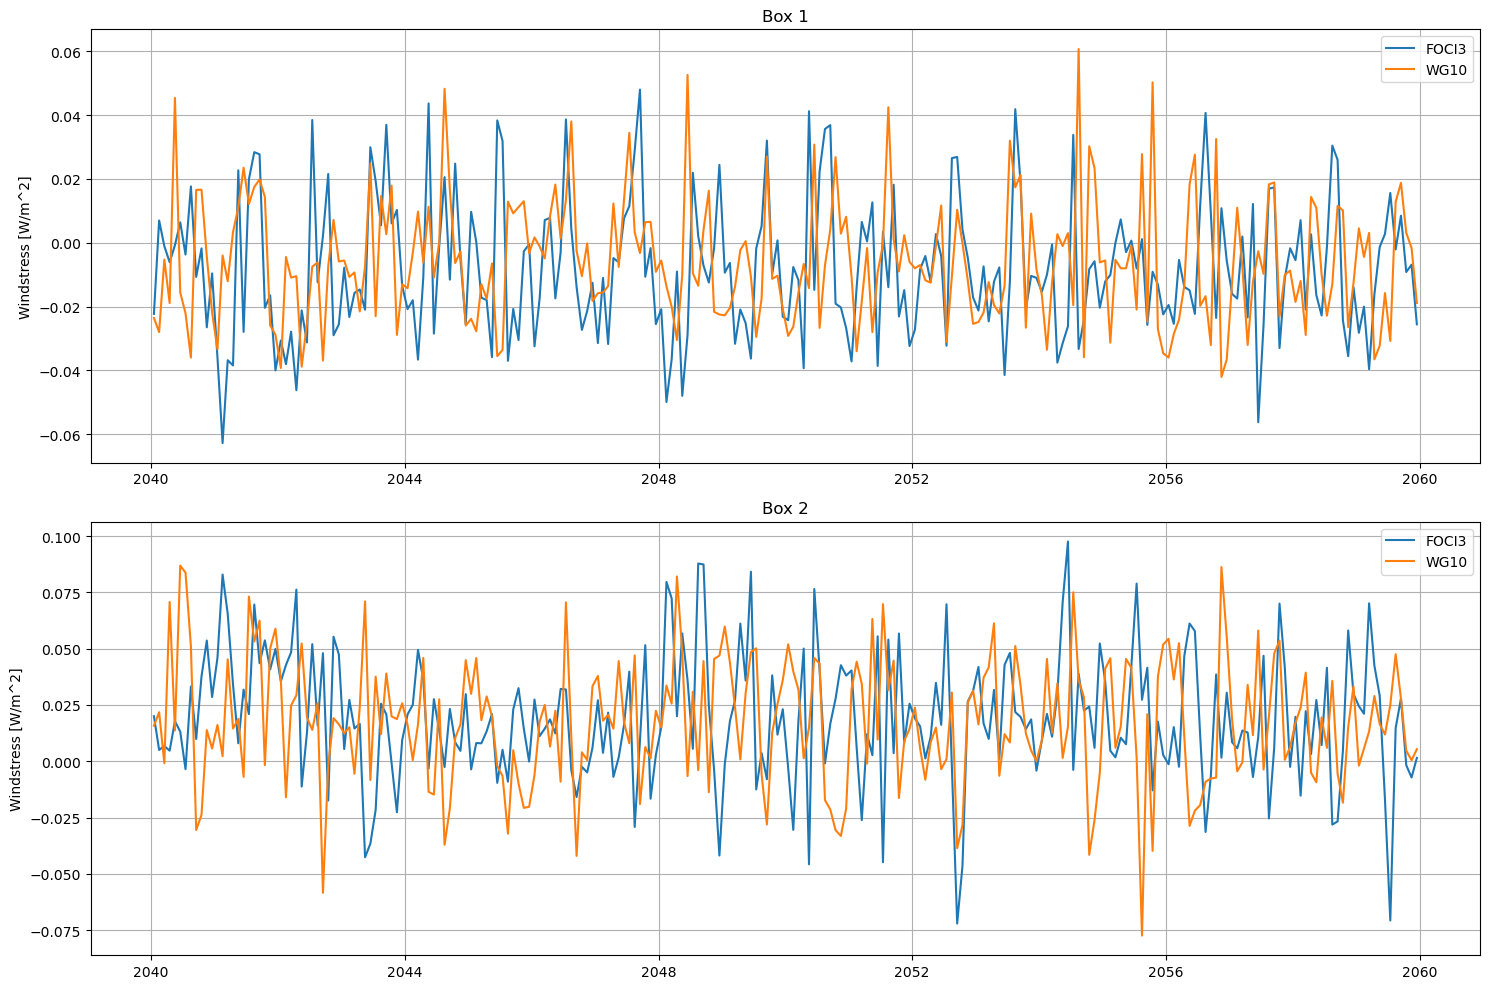

In [54]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

for i in range(len(arr6)):
    ax[0].plot(arr8[i].time_counter, arr8[i], label = arr8_title_list[i])
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Windstress [W/m^2]')
ax[0].set_title('Box 1')

for i in range(len(arr6)):
    ax[1].plot(arr9[i].time_counter, arr9[i], label = arr8_title_list[i])
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Windstress [W/m^2]')
ax[1].set_title('Box 2')

plt.tight_layout()